<h1>Table of Contents<span class="tocSkip"></span></h1>


# Introduction
<hr style="border:2px solid black"> </hr>


**What?** Features correlation



# What is correlation?
<hr style="border:2px solid black"> </hr>


- Correlation is a measure of the association between two variables. 
- It is easy to calculate and interpret when both variables have a well understood Gaussian distribution. 
- When we do not know the distribution of the variables, we must use nonparametric RANK correlation methods. Two of the most used methods are:
    - Spearman’s Rank Correlation 
    - Kendall’s Rank Correlation



# Import modules
<hr style="border:2px solid black"> </hr>

In [9]:
from numpy.random import rand
from numpy.random import seed
from matplotlib import pyplot
from numpy import cov
from scipy.stats import spearmanr, kendalltau, pearsonr

# Create synthetic dataset
<hr style="border:2px solid black"> </hr>

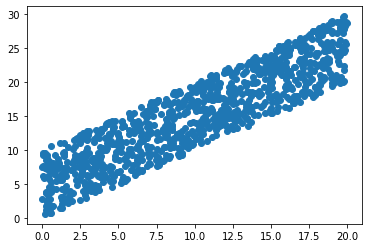

In [7]:
seed(1)
# prepare data
data1 = rand(1000) * 20
data2 = data1 + (rand(1000) * 10)
# plot
pyplot.scatter(data1, data2)
pyplot.show()

# Covariance
<hr style="border:2px solid black"> </hr>


-  Variables can be related by a linear relationship. This is a relationship that is consistently additive across the two data samples.

- This relationship can be summarized between two variables, called the covariance. It is calculated as the average of the product between the values from each sample, where the values haven been centered (had their mean subtracted).

- In formula: `cov(X, Y) = (sum (x - mean(X)) * (y - mean(Y)) ) * 1/(n-1)`

- The sign of the covariance can be interpreted as whether the two variables change in the same direction (positive) or change in different directions (negative). The magnitude of the covariance is **NNOT** easily interpreted. A covariance value of zero indicates that both variables are completely independent.

- Because the dataset was contrived with each variable drawn from a Gaussian distribution and the variables linearly correlated, covariance is a reasonable method for describing the relationship. The covariance between the two variables is 389.75. We can see that it is positive, suggesting the variables change in the same direction as we expect.



In [10]:
# calculate covariance matrix
covariance = cov(data1, data2)
print(covariance)

[[33.29304597 33.78942295]
 [33.78942295 42.89380904]]


# Pearson's Correlation
<hr style="border:2px solid black"> </hr>


- The Pearson correlation coefficient (named for Karl Pearson) can be used to summarize the strength of the **linear relationship** between two data samples.

- The Pearson’s correlation coefficient is calculated as the covariance of the two variables divided by the product of the standard deviation of each data sample. It is the normalization of the covariance between the two variables to give an interpretable score. `Pearson's correlation coefficient = covariance(X, Y) / (stdv(X) * stdv(Y))`

- The use of mean and standard deviation in the calculation suggests the need for the two data samples to have a **Gaussian or Gaussian-like distribution**.

- The normalisation is there so that the result can now be easeily understood.

- The coefficient returns a value between -1 and 1 that represents the limits of correlation from a full negative correlation to a full positive correlation. A value of 0 means no correlation. The value must be interpreted, where often a value below -0.5 or above 0.5 indicates a notable correlation, and values below those values suggests a less notable correlation.



In [8]:
# calculate Pearson's correlation
corr, _ = pearsonr(data1, data2)
print('Pearsons correlation: %.3f' % corr)

Pearsons correlation: 0.894


# Spearman’s Rank Correlation
<hr style="border:2px solid black"> </hr>


- Use for case where the relationshi is nonlinear and the variable can have a non-Gaussian distribution.

- It can still be used if there is a **linear relationship** between the variables, but will have slightly less power (e.g. may result in lower coefficient scores).

- **If you are unsure of the distribution and possible relationships between two variables, Spearman correlation coefficient is a good tool to use.**
 
- The scores are between -1 and 1 for perfectly negatively correlated variables and perfectly positively correlated respectively.

- Instead of calculating the coefficient using covariance and standard deviations on the samples themselves, these statistics are calculated from the relative rank of values on each sample. This is a common approach used in non-parametric statistics, e.g. statistical methods where we do not assume a distribution of the data such as Gaussian.

- `Spearman's correlation coefficient = covariance(rank(X), rank(Y)) / (stdv(rank(X)) * stdv(rank(Y)))`

- This statistical method quantifies the degree to which ranked variables are associated by a monotonic function, meaning an increasing or decreasing relationship.

- Running the example calculates the Spearman’s correlation coefficient between the two variables in the test dataset. The statistical test reports a strong positive correlation with a value of 0.9. 

- The p-value is close to zero, which means that the likelihood of observing the data given that the samples are uncorrelated is very unlikely (e.g. 95% confidence) and that we can reject the null hypothesis that the samples are uncorrelated



In [4]:
# Calculate spearman's correlation
coef, p = spearmanr(data1, data2)
print('Spearmans correlation coefficient: %.3f' % coef) 
# interpret the significance
alpha = 0.05
if p > alpha:
    print('Samples are NOT correlated (fail to reject H0) p=%.3f' % p) 
else:
    print('Samples are correlated (reject H0) p=%.3f' % p)

Spearmans correlation coefficient: 0.900
Samples are correlated (reject H0) p=0.000


# Kendall’s Rank Correlation
<hr style="border:2px solid black"> </hr>


- The intuition for the test is that it calculates a normalized score for the number of matching or concordant rankings between the two samples.
- Running the example calculates the Kendall’s correlation coefficient as 0.7, which is highly correlated. The p-value is close to zero (and printed as zero), as with the Spearman’s test, meaning that we can confidently reject the null hypothesis that the samples are uncorrelated



In [6]:
# calculate kendall's correlation
coef, p = kendalltau(data1, data2)
print('Kendall correlation coefficient: %.3f' % coef) # interpret the significance
alpha = 0.05
if p > alpha:
    print('Samples are NOT correlated (fail to reject H0) p=%.3f' % p) 
else:
    print('Samples are correlated (reject H0) p=%.3f' % p)

Kendall correlation coefficient: 0.709
Samples are correlated (reject H0) p=0.000


# Conclusions
<hr style="border:2px solid black"> </hr>


| Method      | Interpretability | Linear   | Non-Linear | Gaussian | Non-Gaussian |
| ----------- | ---------------- | -------- | ---------- | -------- | ------------ |
| Covariance  | Not easy         | &#10004; |     No     | &#10004; |    No        |
| Pearson     | Easy             | &#10004; |     No     | &#10004; |    No        | 
| Spearman    | Easy             | &#10004; |  &#10004;  |    ?     | &#10004;     |
| Kendall     | Easy             |   ?      |  &#10004;  |    ?     | &#10004;     |



# References
<hr style="border:2px solid black"> </hr>


- https://machinelearningmastery.com/how-to-calculate-nonparametric-rank-correlation-in-python/
- https://machinelearningmastery.com/how-to-use-correlation-to-understand-the-relationship-between-variables/

